In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
from random import shuffle
import pandas as pd
import numpy as np
import json
import os

In [ ]:
# Ruta del archivo JSON en Google Drive
ruta_json = '/content/drive/MyDrive/Archivos JSON (Materials Project)/cubic.json'

# Cargar el archivo JSON en un DataFrame de pandas
df = pd.read_json(ruta_json, lines=True)

In [ ]:
ruta_carpeta = '/content/drive/MyDrive/Archivos JSON (Materials Project)/'

# Lista para almacenar DataFrames individuales
dataframes = []

# Iterar sobre los archivos en la carpeta
for archivo in os.listdir(ruta_carpeta):
    if archivo.endswith('.json'):
        ruta_archivo = os.path.join(ruta_carpeta, archivo)

        # Cargar el archivo JSON en un DataFrame
        df_temp = pd.read_json(ruta_archivo, lines=True)

        # Seleccionar 950 filas
        df_temp = df_temp.iloc[:600]

        # Agregar el DataFrame a la lista
        dataframes.append(df_temp)


In [ ]:
df_hexagonal = dataframes[0]
df_triclinic = dataframes[1]
df_cubic = dataframes[2]
df_trigonal = dataframes[3]
df_monoclinic =  dataframes[4]
df_tetragonal = dataframes[5]
df_orthorhombic = dataframes[6]

In [ ]:
def desplazar(arr, desplazamiento):
  return np.roll(arr, desplazamiento)

def desp_DataFrame(df,desp):
  return df.apply(lambda x: desplazar(x, desp))

In [ ]:

# Definir la función lista_a_array
def lista_a_array(lista):
    return np.array(lista)

# Lista de nombres de DataFrames y sus correspondientes sufijos
df_list = [
    'hexagonal',
    'triclinic',
    'cubic',
    'trigonal',
    'monoclinic',
    'tetragonal',
    'orthorhombic'
]

# Inicializar diccionarios para almacenar los arrays X y las series cs
X_dict = {}
cs_dict = {}


# Bucle para procesar cada DataFrame
for df_name in df_list:
    print(f"Procesando {df_name}...")
    # Obtener los DataFrames izquierdo y derecho
    df_izq = desp_DataFrame(globals()[f"df_{df_name}"], -1)
    df_der = desp_DataFrame(globals()[f"df_{df_name}"], 1)

    # Imprimir información para diagnóstico
    print(f"{df_name}: DataFrame izquierdo shape={df_izq.shape}, DataFrame derecho shape={df_der.shape}")

    # Asignar la columna 'crystal_system' a los DataFrames izquierdo y derecho
    df_izq['crystal_system'] = globals()[f"df_{df_name}"]['crystal_system']
    df_der['crystal_system'] = globals()[f"df_{df_name}"]['crystal_system']

    # Aplicar la función lista_a_array a la columna 'intensity'
    globals()[f"df_{df_name}"]['intensity'] = globals()[f"df_{df_name}"]['intensity'].apply(lista_a_array)
    df_izq['intensity'] = df_izq['intensity'].apply(lista_a_array)
    df_der['intensity'] = df_der['intensity'].apply(lista_a_array)

    # Concatenar los DataFrames
    globals()[f"df_{df_name}"] = pd.concat([globals()[f"df_{df_name}"], df_izq, df_der], ignore_index=True)

    # Almacenar los arrays X y las series cs en los diccionarios
    X_dict[df_name] = np.vstack(globals()[f"df_{df_name}"]['intensity'])
    cs_dict[df_name] = globals()[f"df_{df_name}"]['crystal_system']

    # Eliminar DataFrames izquierdos y derechos
    del df_izq, df_der

    print(f"{df_name}: Procesamiento completado. DataFrame final shape={globals()[f'df_{df_name}'].shape}")

# Eliminar DataFrames izquierdos y derechos si existen
for df_name in df_list:
    df_izq_name = f"df_{df_name}_izq"
    df_der_name = f"df_{df_name}_der"

    if df_izq_name in globals():
        del globals()[df_izq_name]
    if df_der_name in globals():
        del globals()[df_der_name]

# Eliminar DataFrames originales
for df_name in df_list:
    df_name_full = f"df_{df_name}"
    if df_name_full in globals():
        del globals()[df_name_full]

# Ahora, los DataFrames df_hexagonal, df_triclinic, etc., contienen los resultados finales.
# Además, los arrays X1, X2, ..., X7 y las series cs1, cs2, ..., cs7 están disponibles en los diccionarios X_dict y cs_dict.


Procesando hexagonal...
hexagonal: DataFrame izquierdo shape=(600, 2), DataFrame derecho shape=(600, 2)
hexagonal: Procesamiento completado. DataFrame final shape=(1800, 2)
Procesando triclinic...
triclinic: DataFrame izquierdo shape=(600, 2), DataFrame derecho shape=(600, 2)
triclinic: Procesamiento completado. DataFrame final shape=(1800, 2)
Procesando cubic...
cubic: DataFrame izquierdo shape=(600, 2), DataFrame derecho shape=(600, 2)
cubic: Procesamiento completado. DataFrame final shape=(1800, 2)
Procesando trigonal...
trigonal: DataFrame izquierdo shape=(600, 2), DataFrame derecho shape=(600, 2)
trigonal: Procesamiento completado. DataFrame final shape=(1800, 2)
Procesando monoclinic...
monoclinic: DataFrame izquierdo shape=(600, 2), DataFrame derecho shape=(600, 2)
monoclinic: Procesamiento completado. DataFrame final shape=(1800, 2)
Procesando tetragonal...
tetragonal: DataFrame izquierdo shape=(600, 2), DataFrame derecho shape=(600, 2)
tetragonal: Procesamiento completado. Dat

In [ ]:
# Crear un array X concatenando los arrays X1, X2, ..., X7
X = np.concatenate([X_dict[df_name] for df_name in df_list])

# Crear una serie cs concatenando las series cs1, cs2, ..., cs7
cs = pd.concat([cs_dict[df_name] for df_name in df_list], ignore_index=True)

In [ ]:
X.shape, cs.shape


((12600, 13500), (12600,))

In [ ]:
dicc_classes = {
    'triclinic': 0,
    'monoclinic': 1,
    'orthorhombic': 2,
    'tetragonal': 3,
    'trigonal': 4,
    'hexagonal': 5,
    'cubic': 6
}

In [ ]:
Y = [dicc_classes[i] for i in cs]

In [ ]:
samples = list(zip(X,Y))
shuffle(samples)
X_shuffle, Y_shuffle = zip(*samples)

In [ ]:
del X,Y

In [ ]:
X_ = np.array(X_shuffle)
X_raw = X_.reshape(X_.shape[0],X_.shape[1],1)
Y_raw = np.array(Y_shuffle)

In [ ]:
del X_shuffle, Y_shuffle

In [ ]:
X_norm = X_raw/100

In [ ]:
X = X_norm
Y = Y_raw

In [ ]:
X.shape

(12600, 13500, 1)

In [ ]:
del X_norm,Y_raw

# Determinación de la estructura cristalina de un compuesto a partir de un red convolucional 1D

In [ ]:
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten
from keras.layers import Dropout, Activation
from keras.layers import Convolution1D, MaxPooling1D, AveragePooling1D
from keras.layers import ZeroPadding1D, BatchNormalization
from keras.optimizers import SGD
from keras.models import Model
from keras.utils import plot_model
from keras.utils import to_categorical
import tensorflow as tf
from keras import initializers
from keras.layers import SpatialDropout1D
from sklearn.model_selection import train_test_split
import keras
import time

In [ ]:
Y_categorical = to_categorical(Y)  #Pasamos a formato one hot

In [ ]:
test_size = 0.1

X_train, X_test, Y_train, Y_test = train_test_split(X, Y_categorical, test_size=test_size, random_state=42)

# Definimos la arquitectura de la red neuronal

In [ ]:
def architecture(batch_normalization, dropout, input_shape, activation, num_classes):
  model = Sequential()


  model.add(Convolution1D(60, 100, strides = 5, padding='same', input_shape = (13500,1)))
  if batch_normalization:
    model.add(BatchNormalization())
  model.add(Activation(activation))
  if dropout:
    model.add(Dropout(0.3))
  model.add(AveragePooling1D(pool_size = 3, strides = 2))


  model.add(Convolution1D(60, 50, strides = 5, padding='same'))
  if batch_normalization:
    model.add(BatchNormalization())
  model.add(Activation(activation))
  if dropout:
    model.add(Dropout(0.3))
  model.add(AveragePooling1D(pool_size = 3, strides = None))


  model.add(Convolution1D(60, 25, strides = 2, padding='same'))
  if batch_normalization:
    model.add(BatchNormalization())
  model.add(Activation(activation))
  if dropout:
    model.add(Dropout(0.3))
  model.add(AveragePooling1D(pool_size = 3, strides = None))


  model.add(Flatten())


  model.add(Dense(700))
  if batch_normalization:
    model.add(BatchNormalization())
  model.add(Activation('relu'))
  if dropout:
    model.add(Dropout(0.3))


  model.add(Dense(70))
  if batch_normalization:
    model.add(BatchNormalization())
  model.add(Activation('relu'))
  if dropout:
    model.add(Dropout(0.3))

  model.add(Dense(num_classes))
  model.add(Activation('softmax'))

  return model

In [ ]:
batch_normalization = False
dropout = True
input_shape = (13500,1)
num_classes = 7
activation = 'relu'

model = architecture(batch_normalization, dropout, input_shape, activation, num_classes)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2700, 60)          6060      
                                                                 
 activation (Activation)     (None, 2700, 60)          0         
                                                                 
 dropout (Dropout)           (None, 2700, 60)          0         
                                                                 
 average_pooling1d (Average  (None, 1349, 60)          0         
 Pooling1D)                                                      
                                                                 
 conv1d_1 (Conv1D)           (None, 270, 60)           180060    
                                                                 
 activation_1 (Activation)   (None, 270, 60)           0         
                                                        

In [ ]:
del Y

##Metodo de Optimización

In [ ]:
lr = 0.001

optimizer = keras.optimizers.Adam(learning_rate=lr)

In [ ]:
loss_function = 'categorical_crossentropy'
metric_function = 'accuracy'

## Compilación del modelo


In [ ]:
model.compile(loss=loss_function, optimizer = optimizer, metrics = [metric_function])

##Entrenando...


In [ ]:
validation_portion = 0.2
batch_size = 64
epochs = 70
start_time = time.time()

history_model = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=validation_portion, shuffle=True)

end_time = time.time()
print('Time for training {:18.4f}' .format(end_time-start_time))

Epoch 1/70
142/142 [==============================] - 18s 35ms/step - loss: 1.6725 - accuracy: 0.2830 - val_loss: 1.5295 - val_accuracy: 0.3616
Epoch 2/70
142/142 [==============================] - 4s 27ms/step - loss: 1.4441 - accuracy: 0.3934 - val_loss: 1.2449 - val_accuracy: 0.4951
Epoch 3/70
142/142 [==============================] - 3s 23ms/step - loss: 1.2657 - accuracy: 0.4788 - val_loss: 1.1458 - val_accuracy: 0.5216
Epoch 4/70
142/142 [==============================] - 3s 23ms/step - loss: 1.1692 - accuracy: 0.5334 - val_loss: 1.0043 - val_accuracy: 0.6177
Epoch 5/70
142/142 [==============================] - 3s 23ms/step - loss: 1.0656 - accuracy: 0.5843 - val_loss: 0.9199 - val_accuracy: 0.6658
Epoch 6/70
142/142 [==============================] - 4s 25ms/step - loss: 0.9898 - accuracy: 0.6203 - val_loss: 0.8778 - val_accuracy: 0.6675
Epoch 7/70
142/142 [==============================] - 4s 25ms/step - loss: 0.9089 - accuracy: 0.6502 - val_loss: 0.7648 - val_accuracy: 0.711

In [ ]:
del X_train, Y_train

In [ ]:
from tensorflow.keras.models import save_model

# Supongamos que 'model' es tu modelo entrenado
# ... (código de entrenamiento del modelo)

# Guardar el modelo en formato nativo de Keras (.keras)
save_model(model, 'modelo_entrenado.keras')

In [ ]:
loss = history_model.history['loss'][-1]
val_loss = history_model.history['val_loss'][-1]
acc = history_model.history['accuracy'][-1]
val_acc = history_model.history['val_accuracy'][-1]


title_acc = str(activation)+ ',Adam, ls = ' + str(lr) + '\n' + 'acc_train: ' + \
          str(np.round(acc,4)) + ', acc_val: ' + str(np.round(val_acc,4)) \
          + '\n' + 'BatchNorm = '+ str(batch_normalization) \
          + '\n' + 'Dropout = ' + str(dropout)

title_loss = str(activation)+ ',Adam, ls = ' + str(lr) + '\n' + 'loss_train: ' + \
          str(np.round(loss,4)) + ', acc_val: ' + str(np.round(val_loss,4)) \
          + '\n' + 'BatchNorm = '+ str(batch_normalization) \
          + '\n' + 'Dropout = ' + str(dropout)

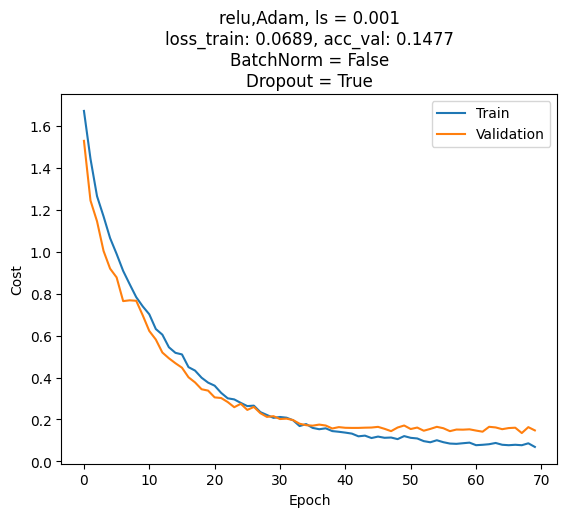

In [ ]:
plt.plot(history_model.history['loss'])
plt.plot(history_model.history['val_loss'])
plt.title(title_loss)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.savefig('Loss')
plt.legend(['Train', 'Validation'], loc='upper right' )

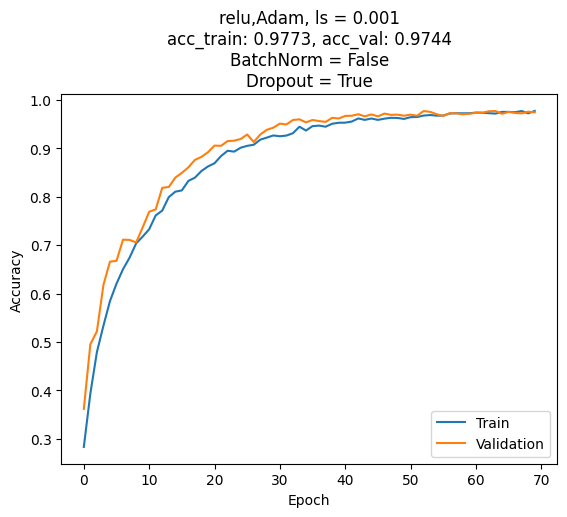

In [ ]:
plt.plot(history_model.history['accuracy'])
plt.plot(history_model.history['val_accuracy'])
plt.title(title_acc)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.savefig('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right' )

In [ ]:
scores = model.evaluate(X_test,Y_test)

print('Test loss: ',scores[0] )
print('Test accuracy: ', scores[1])

40/40 [==============================] - 0s 9ms/step - loss: 0.1905 - accuracy: 0.9738
Test loss:  0.1904526799917221
Test accuracy:  0.973809540271759


In [ ]:
evaluations = model.evaluate(X_test,Y_test)

print('Test loss: ',evaluations[0] )
print('Test accuracy: ', evaluations[1])

40/40 [==============================] - 0s 7ms/step - loss: 0.1905 - accuracy: 0.9738
Test loss:  0.1904526799917221
Test accuracy:  0.973809540271759


In [ ]:
y_target = np.argmax(Y_test, axis=1)
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

40/40 [==============================] - 0s 6ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print('Confusion Matrix')
print(confusion_matrix(y_target, y_pred), '\n')

print('Classification report')
target_names = list(dicc_classes.keys())
print(classification_report(y_target, y_pred, target_names = target_names))

Confusion Matrix
[[172   0   0   0   2   0   0]
 [  4 190   6   0   2   0   0]
 [  1   0 165   2   1   0   0]
 [  0   0   0 186   3   1   0]
 [  0   3   1   1 174   2   0]
 [  0   0   0   0   2 176   0]
 [  0   0   0   0   1   1 164]] 

Classification report
              precision    recall  f1-score   support

   triclinic       0.97      0.99      0.98       174
  monoclinic       0.98      0.94      0.96       202
orthorhombic       0.96      0.98      0.97       169
  tetragonal       0.98      0.98      0.98       190
    trigonal       0.94      0.96      0.95       181
   hexagonal       0.98      0.99      0.98       178
       cubic       1.00      0.99      0.99       166

    accuracy                           0.97      1260
   macro avg       0.97      0.97      0.97      1260
weighted avg       0.97      0.97      0.97      1260



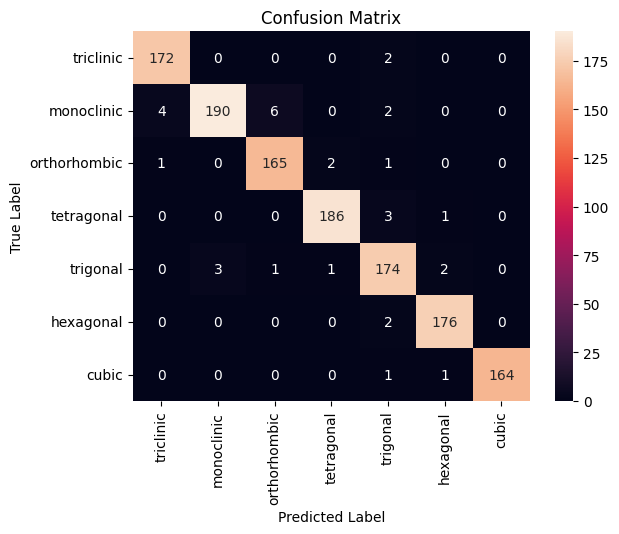

In [ ]:
import seaborn as sns


conf_mat = confusion_matrix(y_target, y_pred)

sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('Matriz de Confusión')
plt.show()

In [ ]:
from tensorflow.keras.models import save_model

# Supongamos que 'model' es tu modelo entrenado
# ... (código de entrenamiento del modelo)

# Guardar el modelo en formato nativo de Keras (.keras)
save_model(model, 'modelo_entrenado.keras')